### Context

### According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
### This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.
Attribute Information

1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

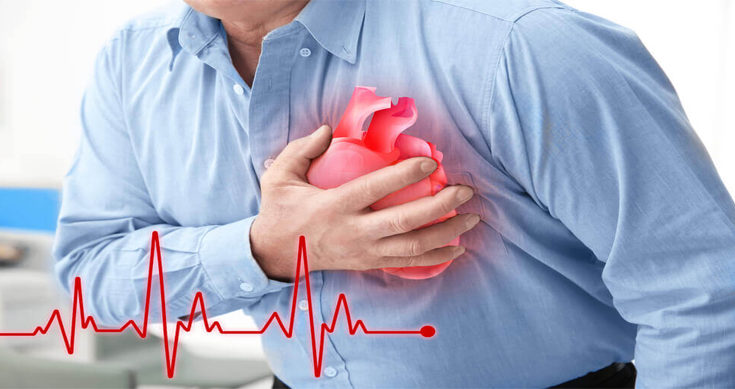

In [184]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [185]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [186]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [187]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [188]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [190]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [191]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5110, dtype: bool

In [192]:
df.shape

(5110, 12)

In [193]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [194]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [195]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [196]:
import warnings
warnings.filterwarnings('ignore')

In [197]:
df.dropna

<bound method DataFrame.dropna of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urba

In [198]:
df.drop(['id'],axis=1,inplace=True)

In [199]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [200]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [201]:
d1 =df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']]

In [202]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

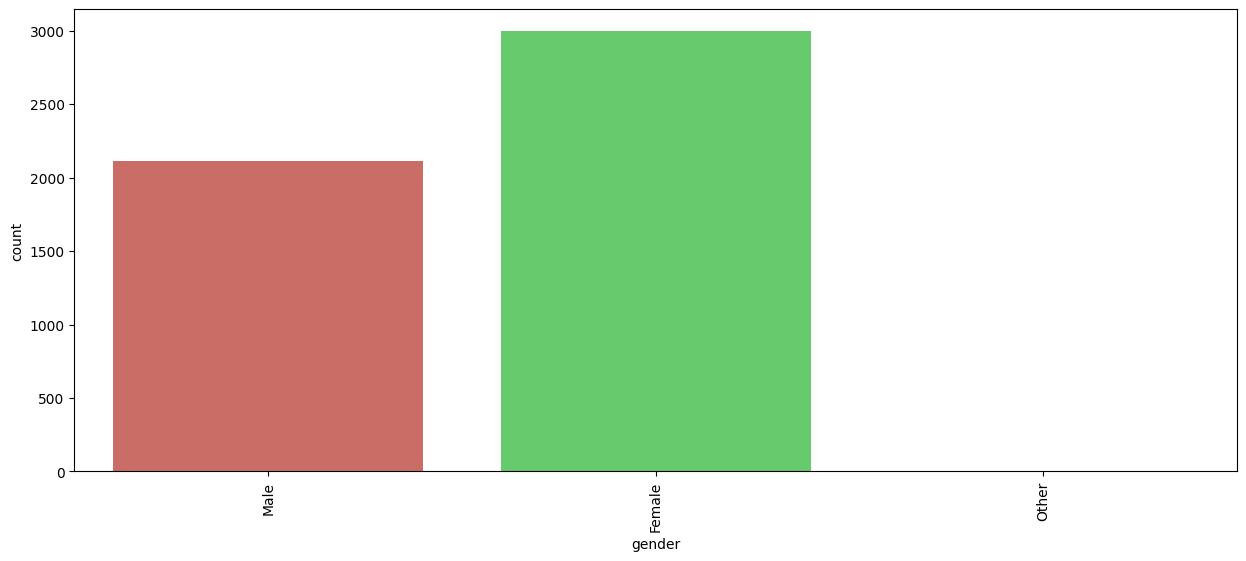

In [203]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='gender',
              palette= 'hls')
plt.xticks(rotation=90)
plt.show()

In [204]:
df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

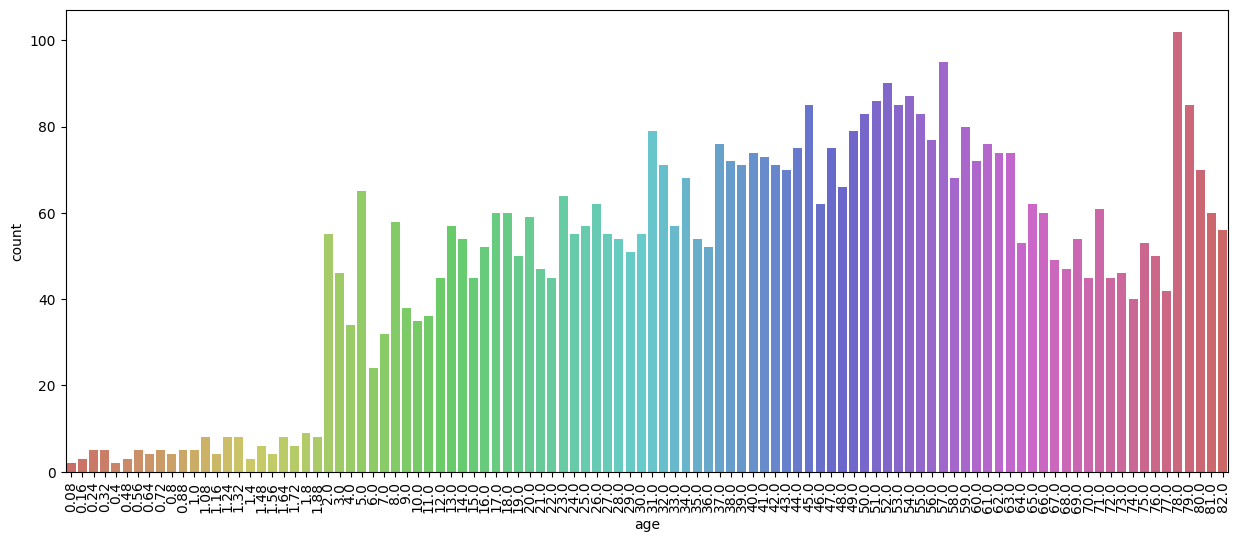

In [205]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='age',
              palette= 'hls')
plt.xticks(rotation=90)
plt.show()

In [206]:
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

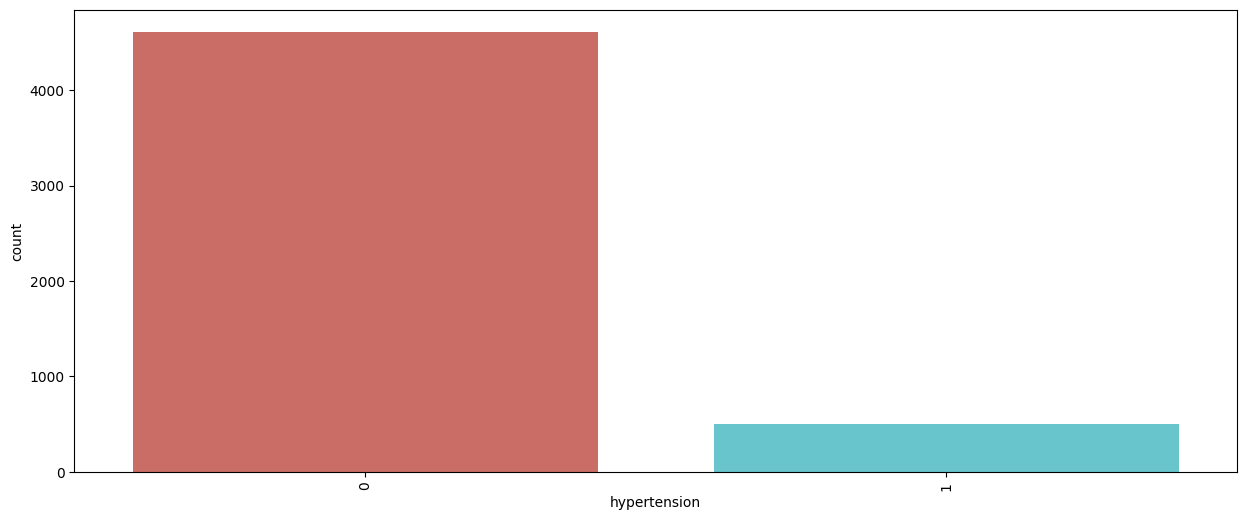

In [207]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='hypertension',
              palette= 'hls')
plt.xticks(rotation=90)
plt.show()

In [208]:
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

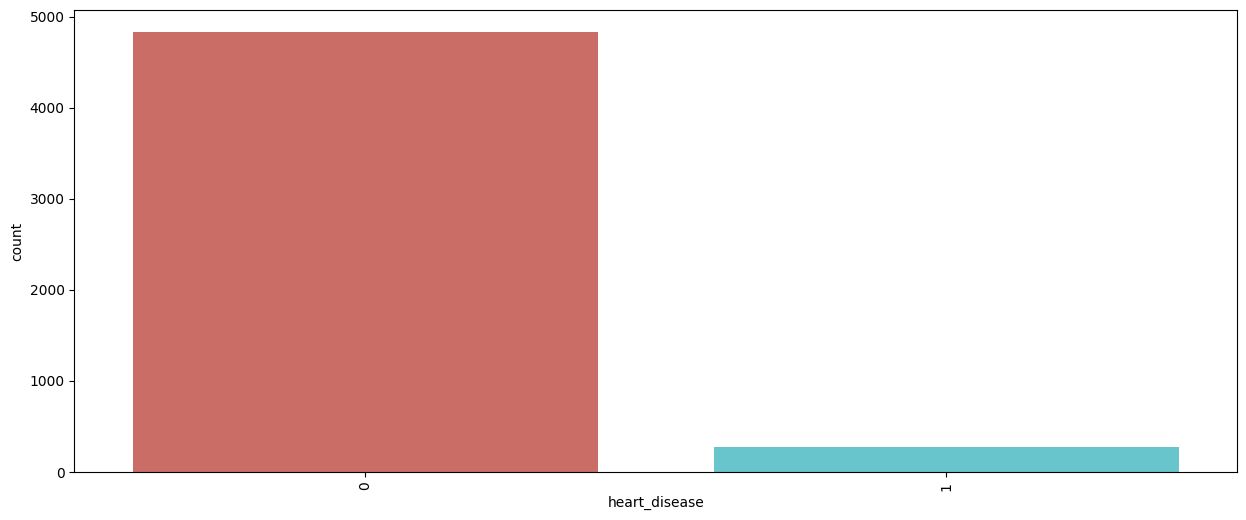

In [209]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='heart_disease',
              palette= 'hls')
plt.xticks(rotation=90)
plt.show()

In [210]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

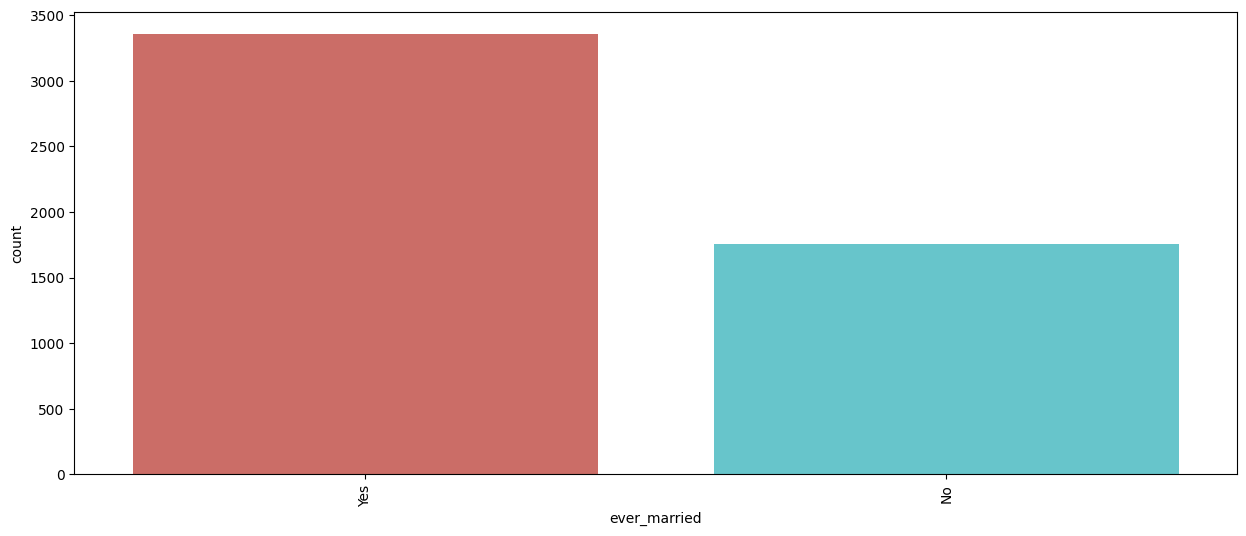

In [211]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='ever_married',
              palette= 'hls')
plt.xticks(rotation=90)
plt.show()

In [212]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

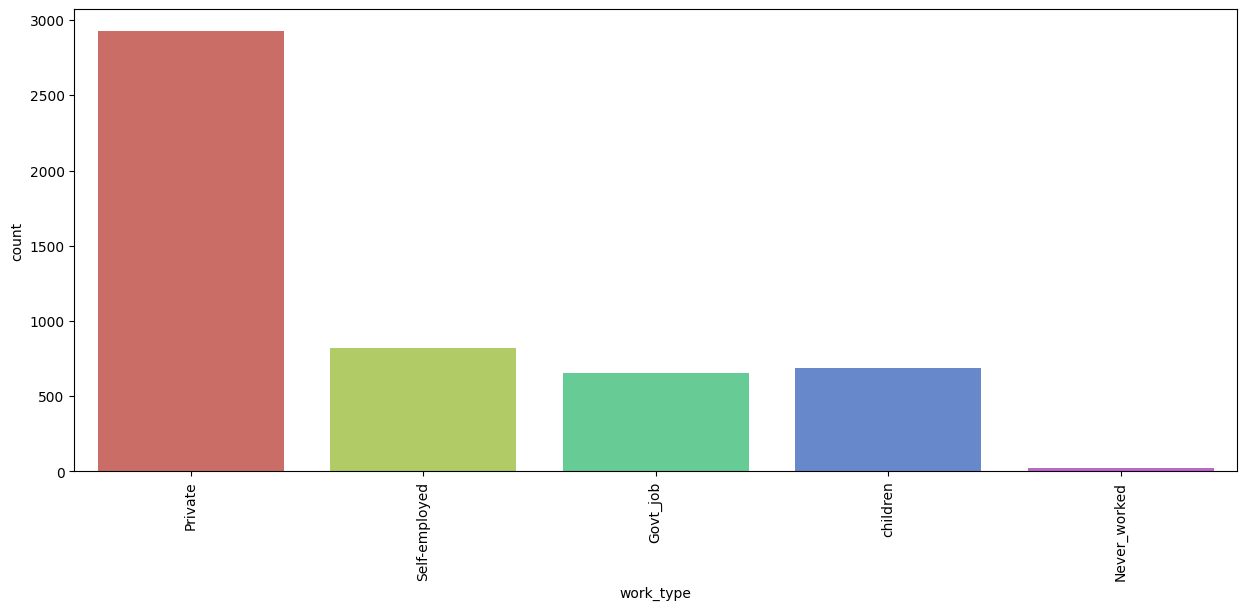

In [213]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='work_type',
              palette= 'hls')
plt.xticks(rotation=90)
plt.show()

In [214]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

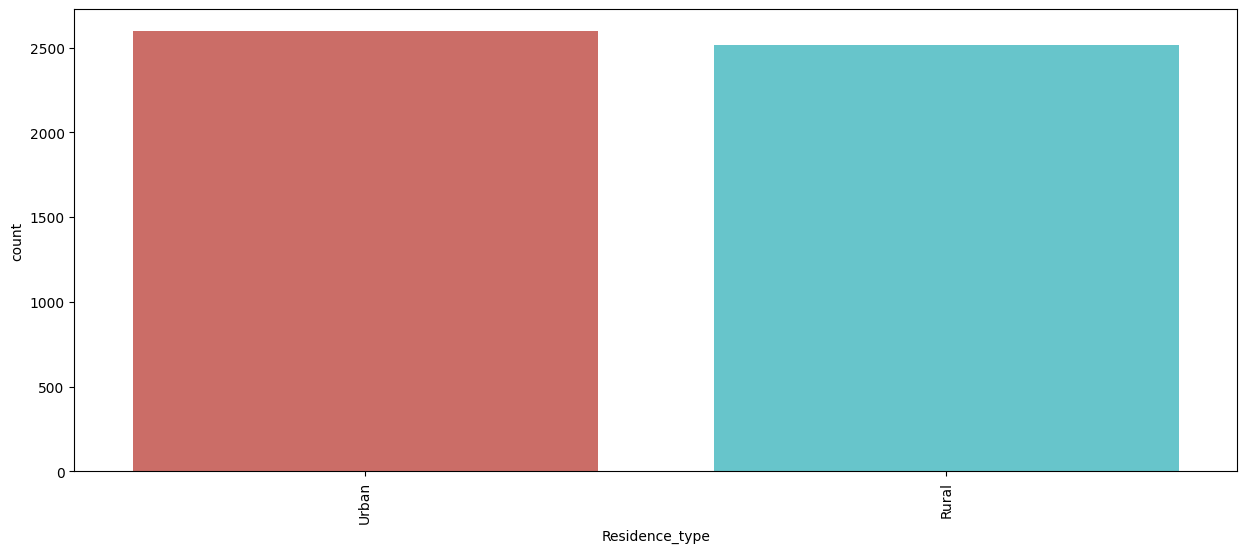

In [215]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Residence_type',
              palette= 'hls')
plt.xticks(rotation=90)
plt.show()

In [216]:
df['avg_glucose_level'].value_counts()

93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64

In [217]:
df['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [218]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

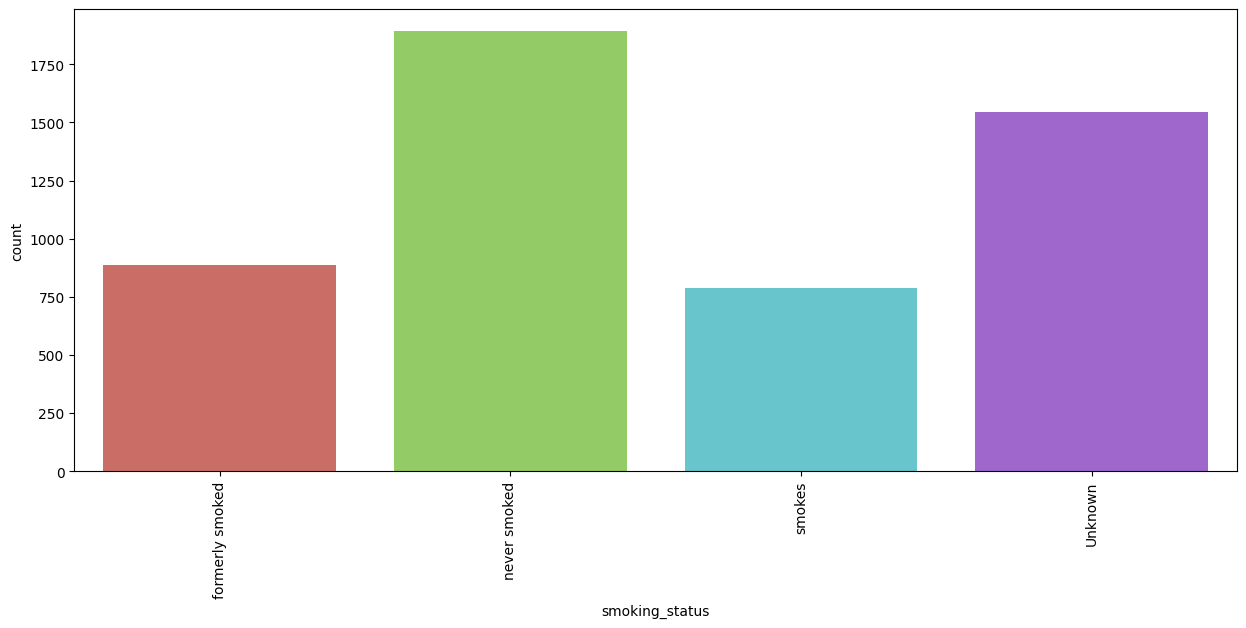

In [219]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='smoking_status',
              palette= 'hls')
plt.xticks(rotation=90)
plt.show()

In [220]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

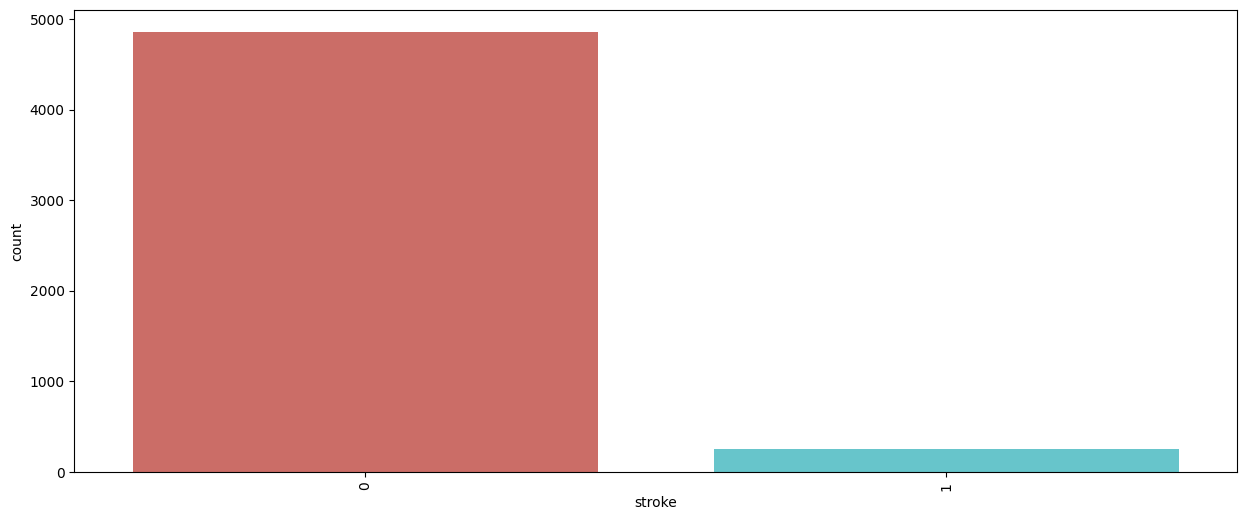

In [221]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='stroke',
              palette= 'hls')
plt.xticks(rotation=90)
plt.show()

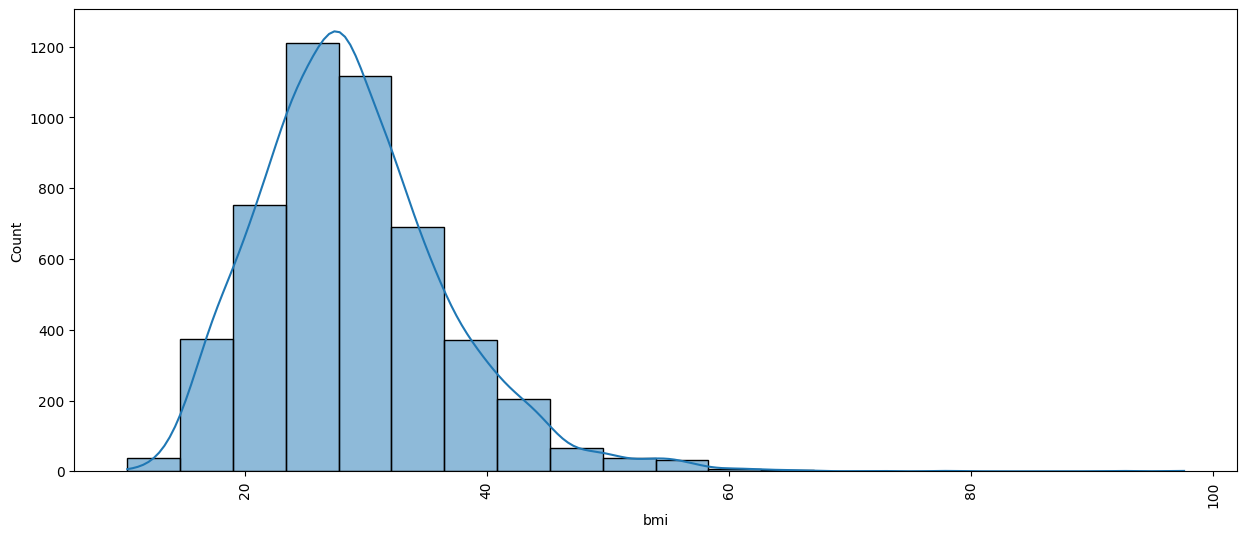

In [222]:
plt.figure(figsize=(15,6))
sns.histplot(df['bmi'],bins=20,kde=True, palette='husl')
plt.xticks(rotation = 90)
plt.show()

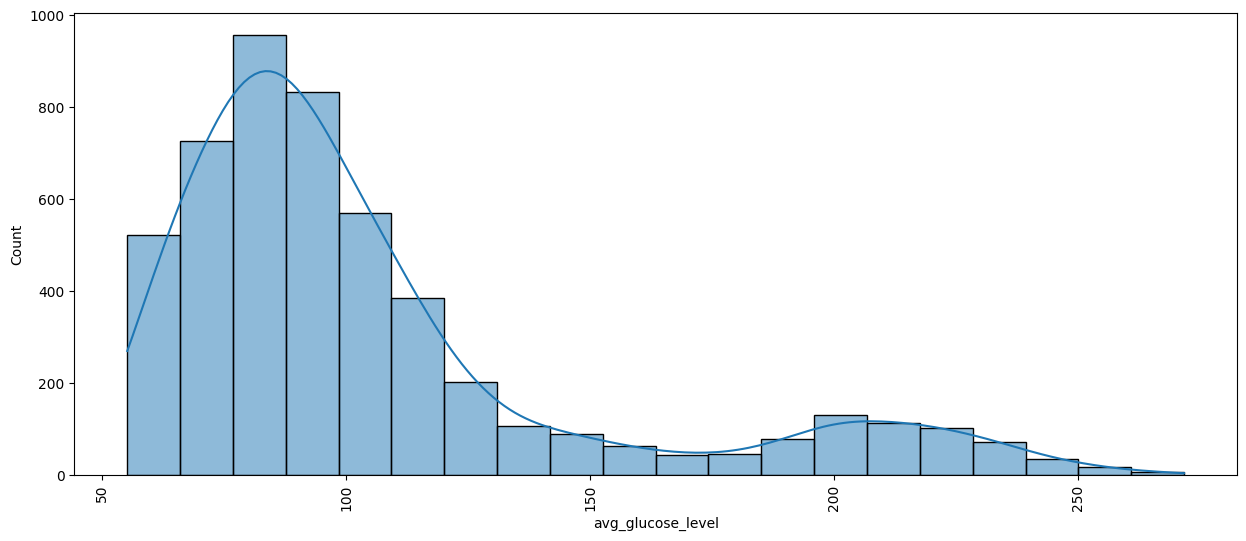

In [223]:
plt.figure(figsize=(15,6))
sns.histplot(df['avg_glucose_level'],bins=20,kde=True, palette='husl')
plt.xticks(rotation = 90)
plt.show()

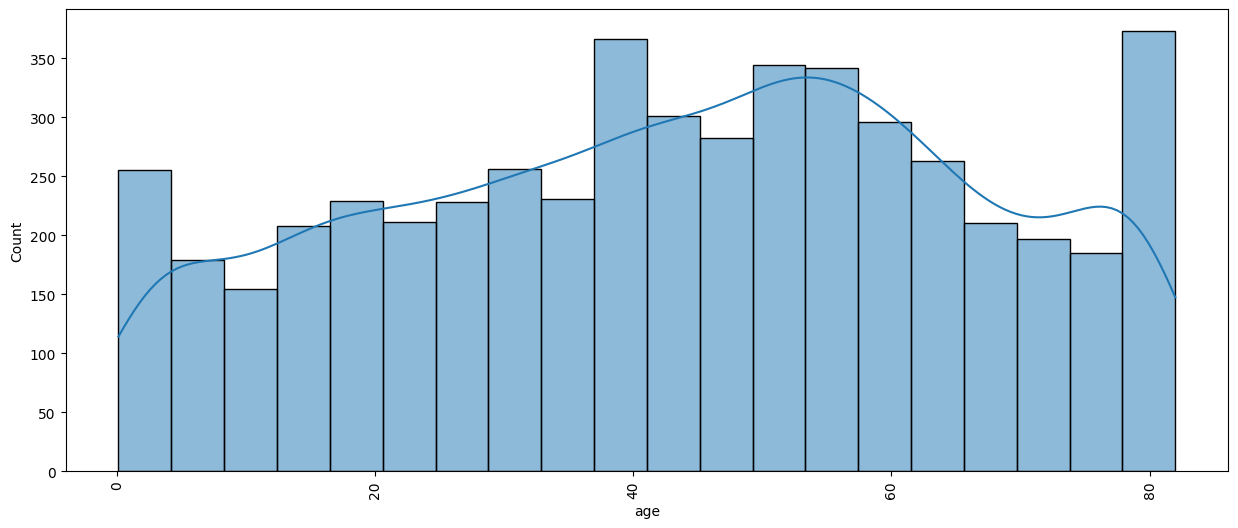

In [224]:
plt.figure(figsize=(15,6))
sns.histplot(df['age'],bins=20,kde=True, palette='husl')
plt.xticks(rotation = 90)
plt.show()

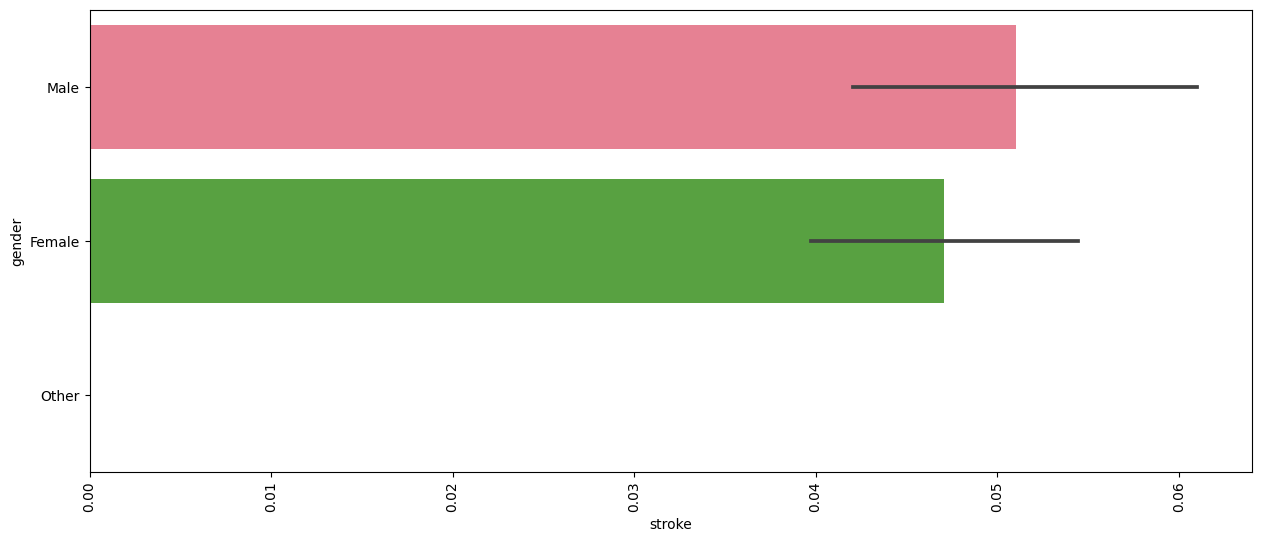

In [225]:
plt.figure(figsize=(15,6))
sns.barplot(y= df['gender'],x =df['stroke'],data=df,  palette='husl')
plt.xticks(rotation = 90)
plt.show()

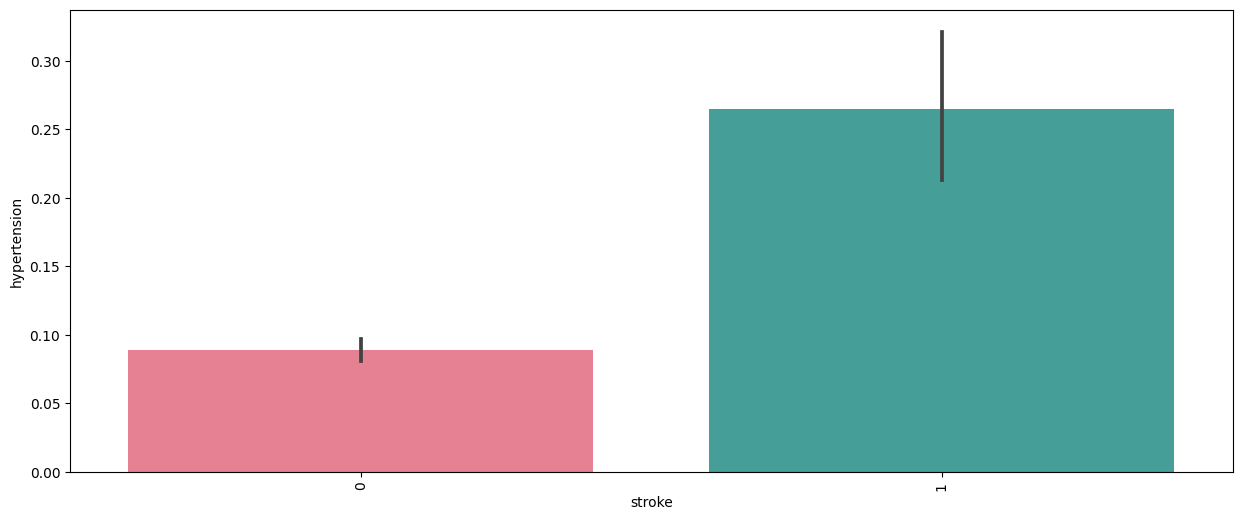

In [226]:
plt.figure(figsize=(15,6))
sns.barplot(y= df['hypertension'],x =df['stroke'],data=df,  palette='husl')
plt.xticks(rotation = 90)
plt.show()

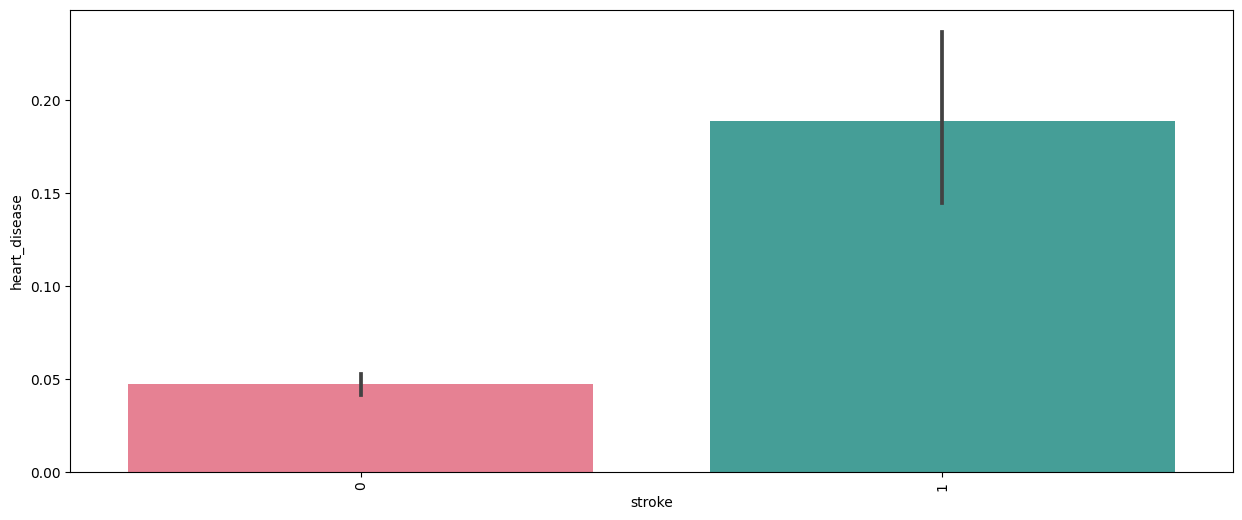

In [227]:
plt.figure(figsize=(15,6))
sns.barplot(y= df['heart_disease'],x =df['stroke'],data=df,  palette='husl')
plt.xticks(rotation = 90)
plt.show()

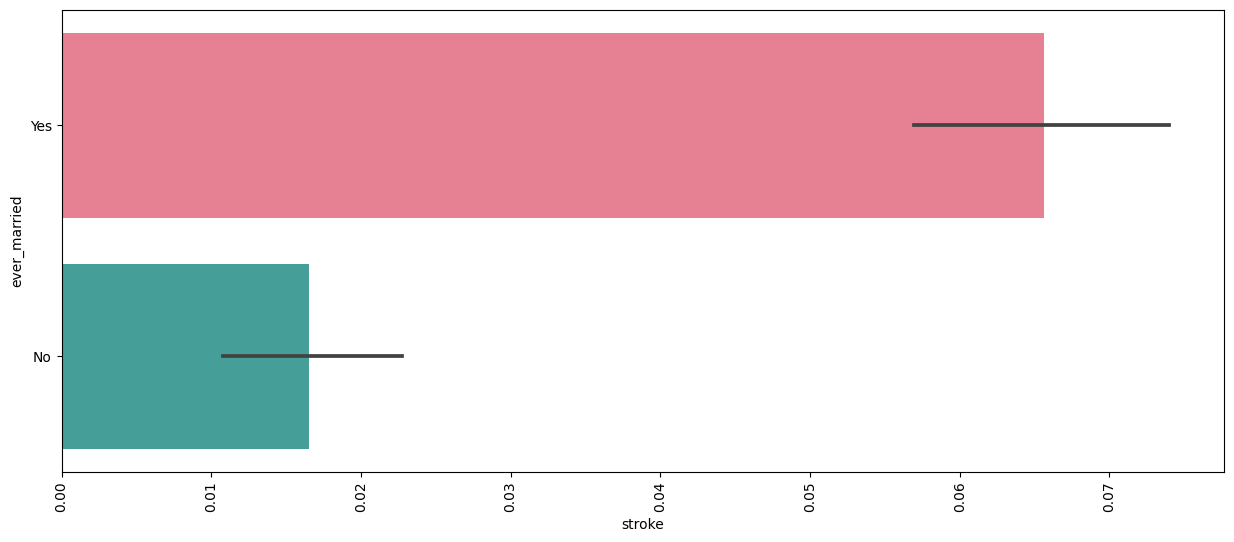

In [228]:
plt.figure(figsize=(15,6))
sns.barplot(y= df['ever_married'],x =df['stroke'],data=df,  palette='husl')
plt.xticks(rotation = 90)
plt.show()

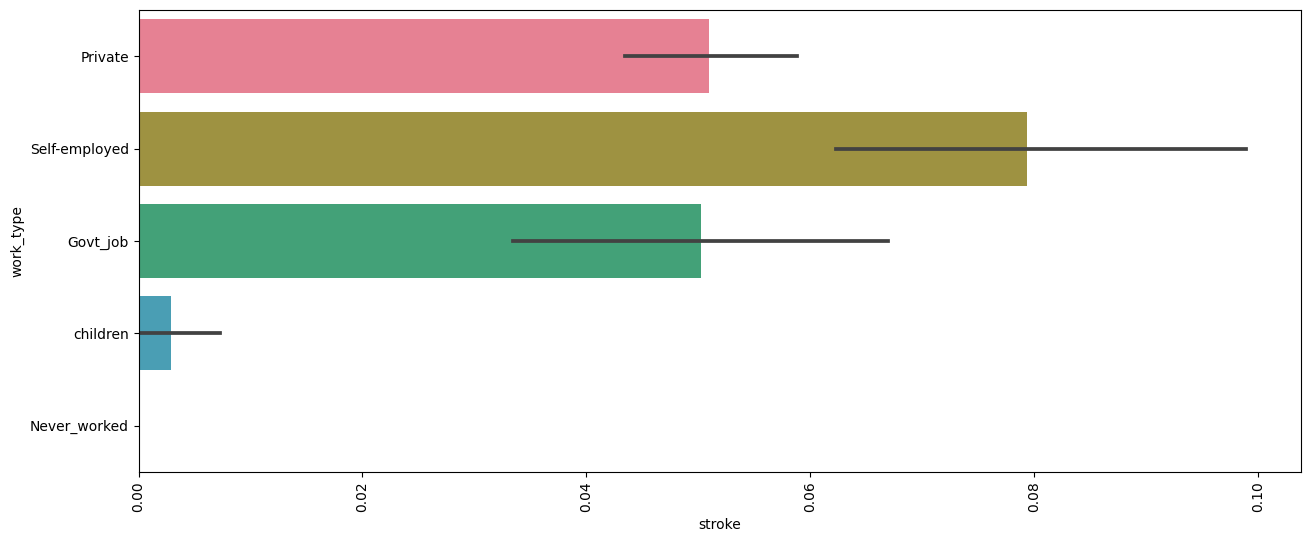

In [229]:
plt.figure(figsize=(15,6))
sns.barplot(y= df['work_type'],x =df['stroke'],data=df,  palette='husl')
plt.xticks(rotation = 90)
plt.show()

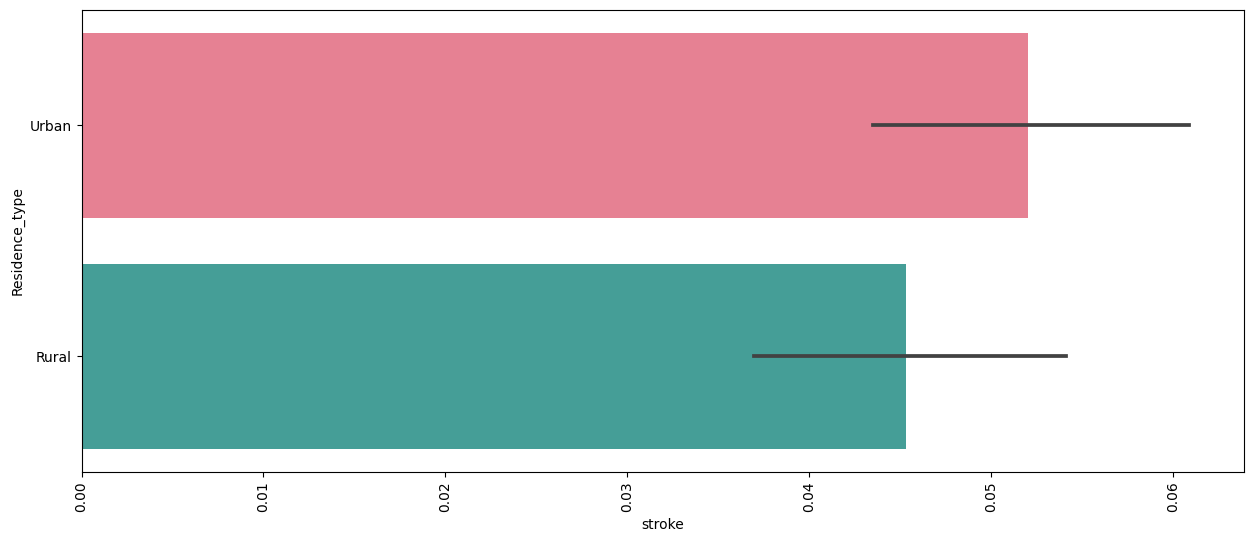

In [230]:
plt.figure(figsize=(15,6))
sns.barplot(y= df['Residence_type'],x =df['stroke'],data=df,  palette='husl')
plt.xticks(rotation = 90)
plt.show()

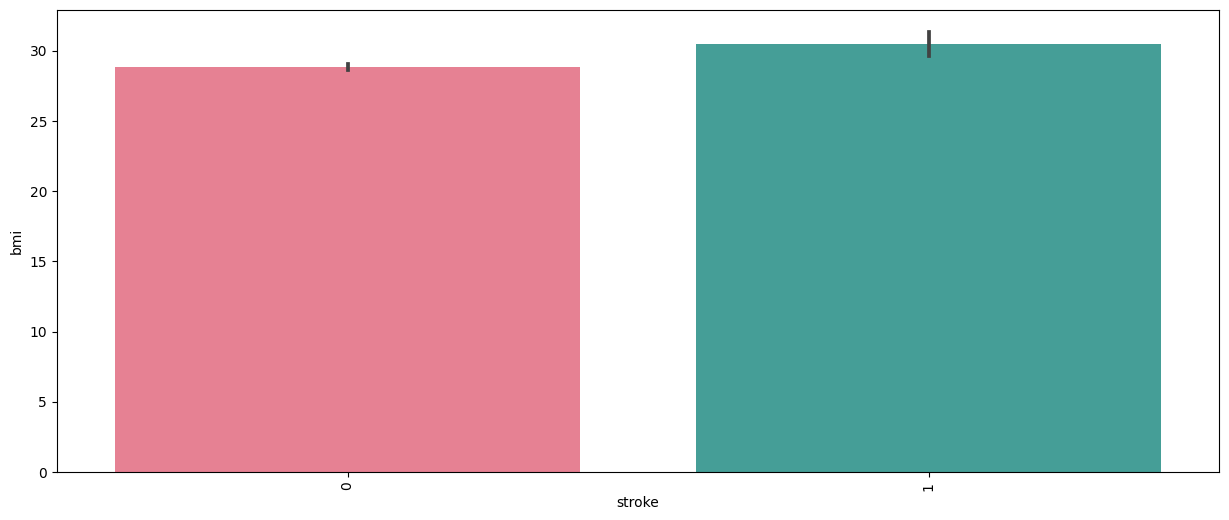

In [231]:
plt.figure(figsize=(15,6))
sns.barplot(y= df['bmi'],x =df['stroke'],data=df,  palette='husl')
plt.xticks(rotation = 90)
plt.show()

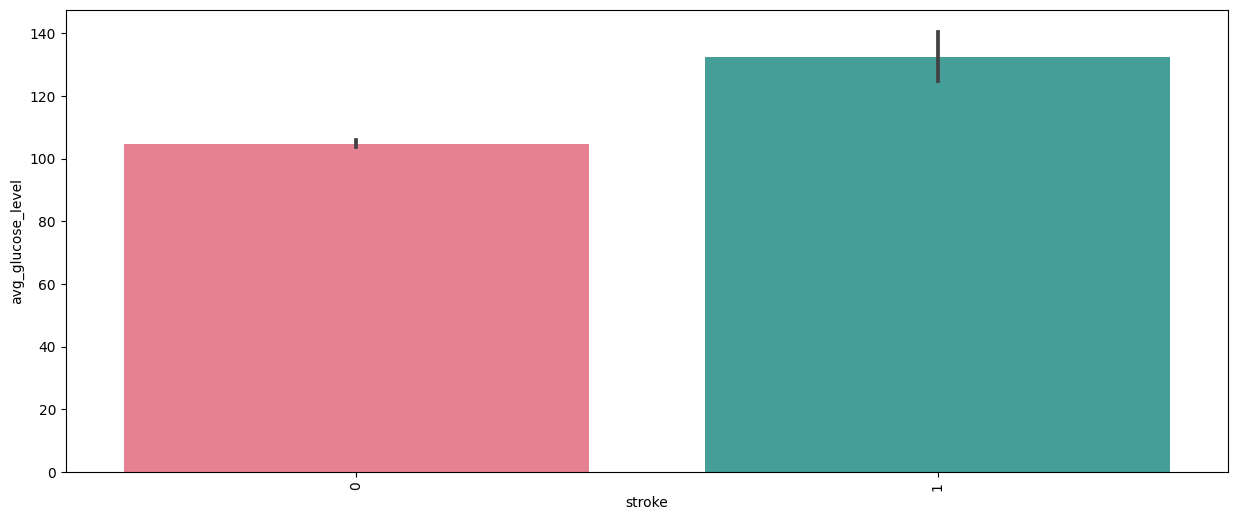

In [232]:
plt.figure(figsize=(15,6))
sns.barplot(y= df['avg_glucose_level'],x =df['stroke'],data=df,  palette='husl')
plt.xticks(rotation = 90)
plt.show()

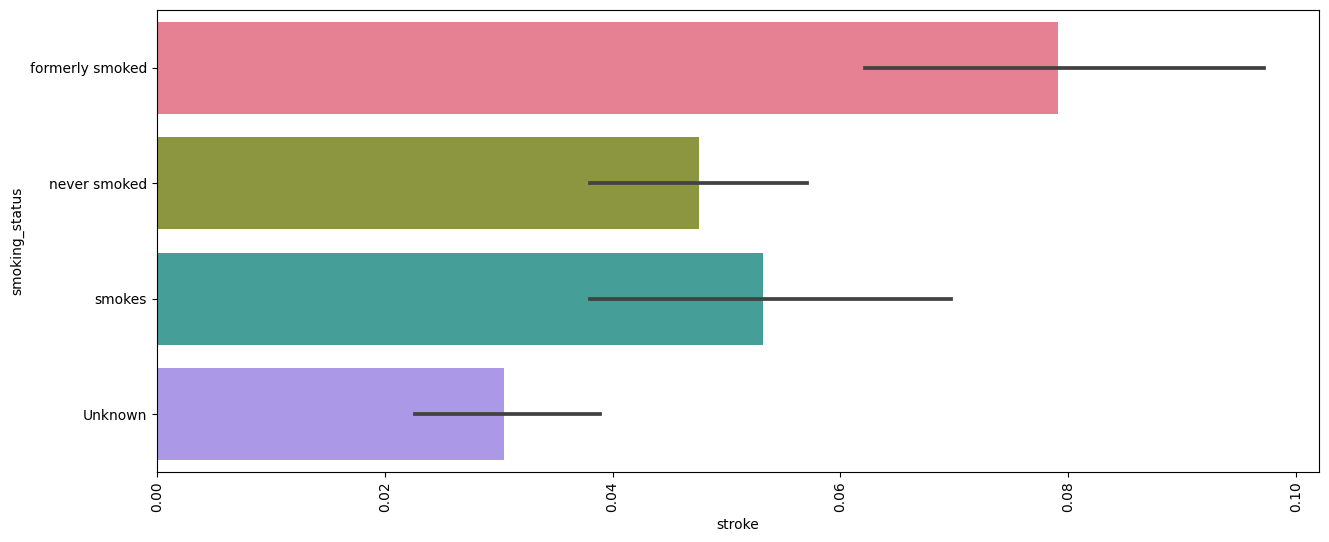

In [233]:
plt.figure(figsize=(15,6))
sns.barplot(y= df['smoking_status'],x =df['stroke'],data=df,  palette='husl')
plt.xticks(rotation = 90)
plt.show()

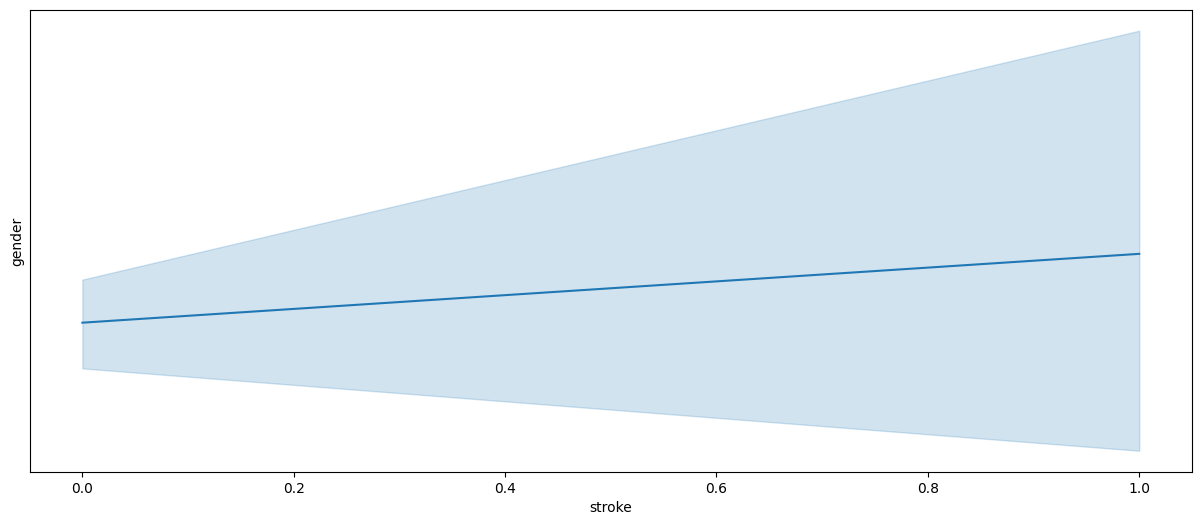

In [234]:
plt.figure(figsize=(15,6))
sns.lineplot(y= df['gender'],x =df['stroke'],data=df,  palette='husl')
plt.show()

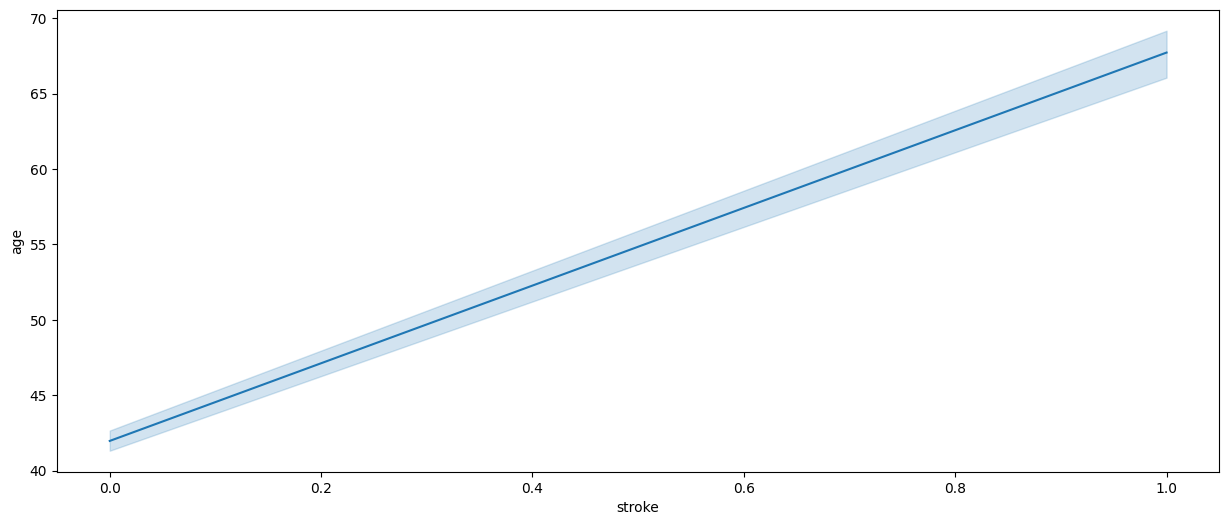

In [235]:
plt.figure(figsize=(15,6))
sns.lineplot(y= df['age'],x =df['stroke'],data=df,  palette='husl')
plt.show()

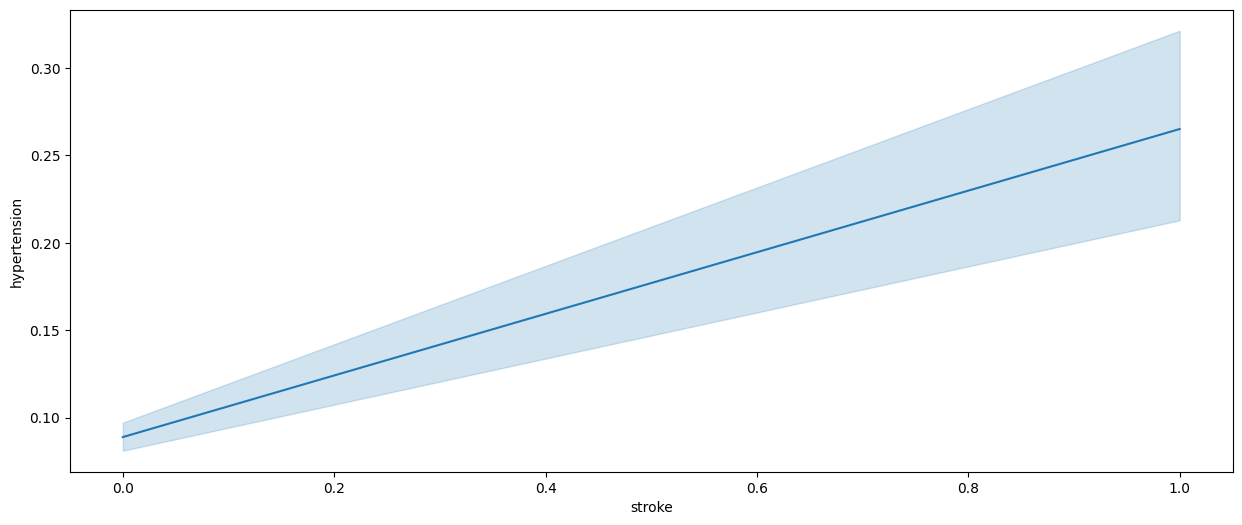

In [236]:
plt.figure(figsize=(15,6))
sns.lineplot(y= df['hypertension'],x =df['stroke'],data=df,  palette='husl')
plt.show()

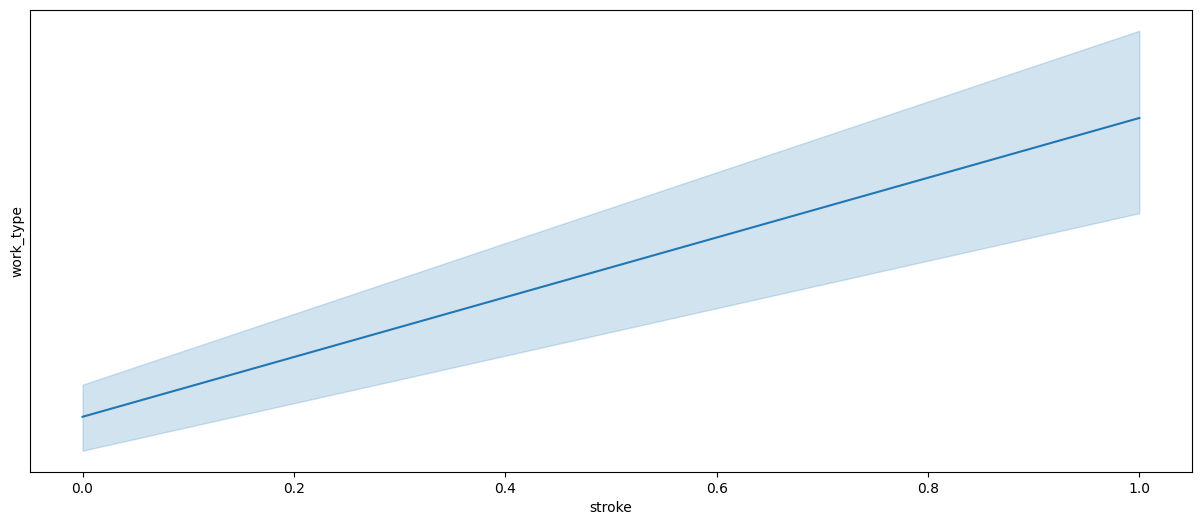

In [237]:
plt.figure(figsize=(15,6))
sns.lineplot(y= df['work_type'],x =df['stroke'],data=df,  palette='husl')
plt.show()

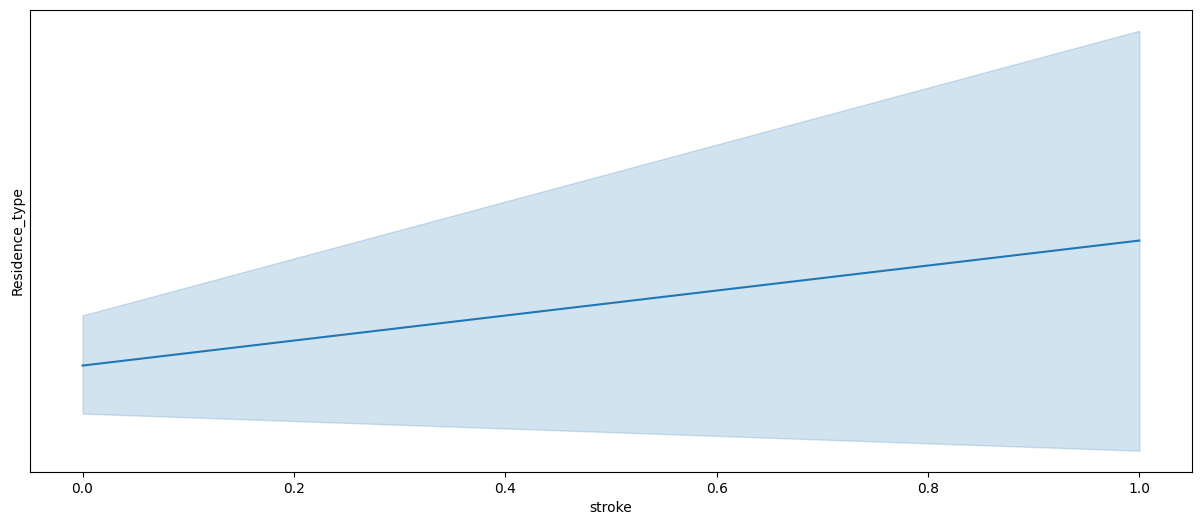

In [238]:
plt.figure(figsize=(15,6))
sns.lineplot(y= df['Residence_type'],x =df['stroke'],data=df,  palette='husl')
plt.show()

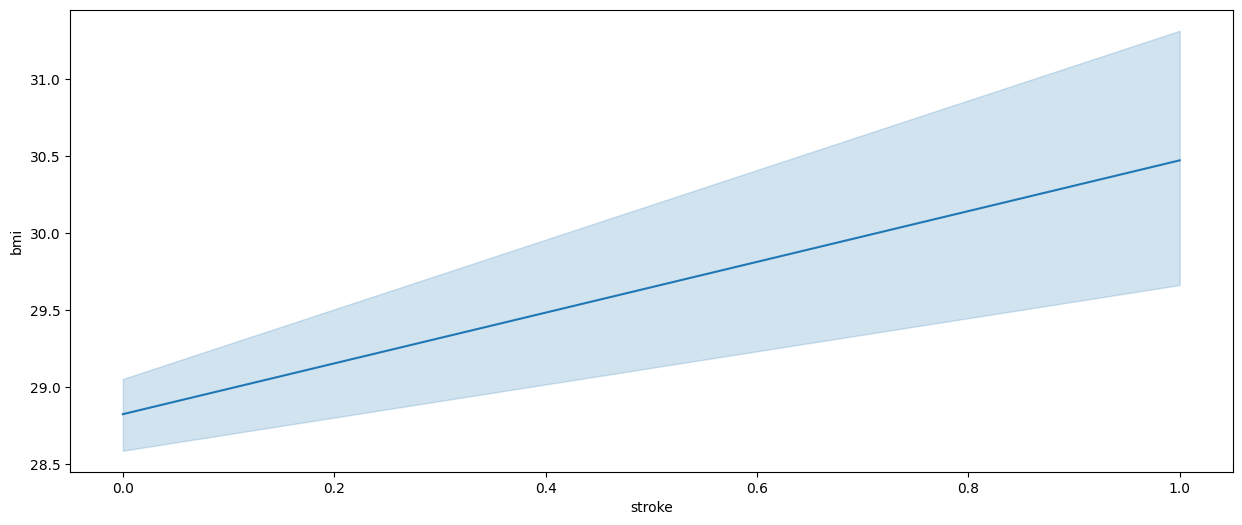

In [239]:
plt.figure(figsize=(15,6))
sns.lineplot(y= df['bmi'],x =df['stroke'],data=df,  palette='husl')
plt.show()

In [240]:
df_corr = df.corr()

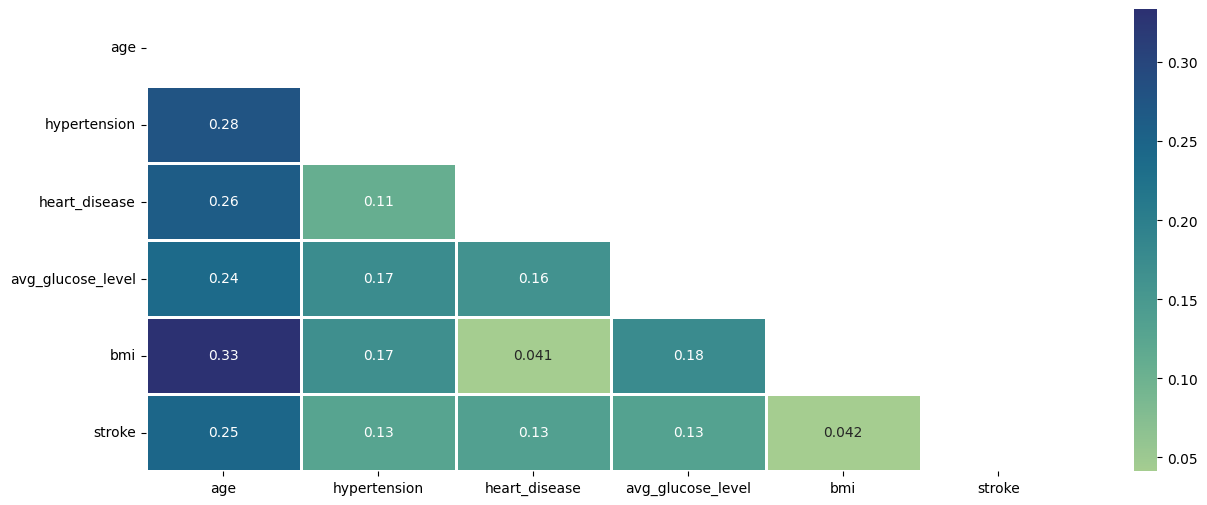

In [241]:
plt.figure(figsize=(15,6))
matrix = np.triu(df_corr)
sns.heatmap(df_corr,annot=True,linewidth=.8,mask=matrix, cmap='crest')
plt.show()

In [242]:
from sklearn.preprocessing import LabelEncoder

In [243]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df.gender=label_encoder.fit_transform(df.gender)
df.ever_married=label_encoder.fit_transform(df.ever_married)
df.work_type=label_encoder.fit_transform(df.work_type)
df.Residence_type=label_encoder.fit_transform(df.Residence_type)
df.smoking_status = label_encoder.fit_transform(df.smoking_status)

In [244]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [245]:
df.dropna( inplace=True)

In [246]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [247]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [248]:
X = df.drop('stroke', axis = 1)
y = df['stroke']

In [249]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2
5,1,81.0,0,0,1,2,1,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2
5107,0,35.0,0,0,1,3,0,82.99,30.6,2
5108,1,51.0,0,0,1,2,0,166.29,25.6,1


In [250]:
y

0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4909, dtype: int64

In [251]:
from sklearn.preprocessing import StandardScaler

In [252]:
X = pd.DataFrame(StandardScaler().fit_transform(X))

In [253]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [254]:
X_train

,0,1,2,3,4,5,6,7,8,9
336,-0.833023,-1.279901,-0.318067,-0.228208,-1.370831,1.674998,-1.014569,-0.741677,-1.068757,-1.288808
2303,-0.833023,0.671075,-0.318067,-0.228208,0.729484,-0.155697,-1.014569,-0.892510,-0.546682,-0.351788
4772,-0.833023,0.759755,-0.318067,-0.228208,0.729484,-0.155697,-1.014569,-0.141945,-0.355678,0.585232
3193,-0.833023,-1.058199,-0.318067,-0.228208,-1.370831,-0.155697,0.985640,-0.586566,-0.674017,-1.288808
4326,-0.833023,1.735243,-0.318067,-0.228208,0.729484,-0.155697,0.985640,-0.510474,-1.399830,1.522252
...,...,...,...,...,...,...,...,...,...,...
4426,-0.833023,-1.058199,-0.318067,-0.228208,-1.370831,-0.155697,0.985640,-0.360316,-0.865021,0.585232
466,-0.833023,0.360692,-0.318067,-0.228208,0.729484,-0.155697,-1.014569,-0.503720,0.102730,1.522252
3092,-0.833023,0.449373,-0.318067,-0.228208,0.729484,-0.155697,-1.014569,-0.329924,-0.865021,-0.351788
3772,-0.833023,-1.412922,-0.318067,-0.228208,-1.370831,1.674998,-1.014569,-0.265538,-1.030557,-1.288808


In [255]:
y_train

378     0
2420    0
4967    0
3348    0
4511    0
       ..
4613    0
511     0
3247    0
3946    0
916     0
Name: stroke, Length: 3436, dtype: int64

## Decision Tree

In [256]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [257]:
y_pred = classifier.predict(X_test)

In [258]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [259]:
print('Confusion matrix : \n',cm)

Confusion matrix : 
 [[1352   49]
 [  63    9]]


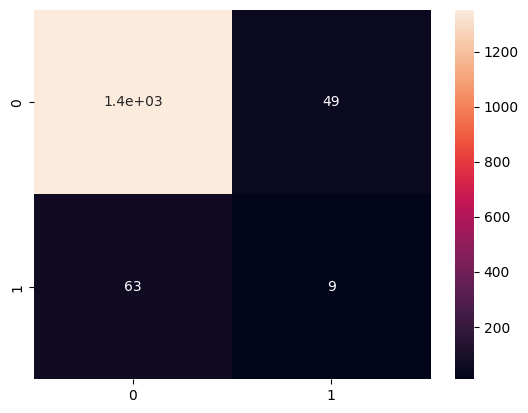

In [260]:
sns.heatmap(cm,annot = True)
plt.show()

In [261]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [262]:
print("\n Classification report for classifier %s:\n%s\n" % (classifier, metrics.classification_report(y_test,y_pred)))


 Classification report for classifier DecisionTreeClassifier(criterion='entropy', random_state=0):
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1401
           1       0.16      0.12      0.14        72

    accuracy                           0.92      1473
   macro avg       0.56      0.55      0.55      1473
weighted avg       0.92      0.92      0.92      1473




## Logistic Regression

In [263]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [264]:
smote = SMOTE()

In [265]:
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

In [266]:
print(Counter(y_train))
print(Counter(y_train_smote))

Counter({0: 3299, 1: 137})
Counter({0: 3299, 1: 3299})


In [267]:
clf = LogisticRegression()
clf.fit(X_train_smote,y_train_smote)

LogisticRegression()

In [268]:
y_pred =clf.predict(X_test)

In [269]:
accuracy_score(y_test,y_pred)

0.7386286490156144

In [270]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score,precision_score

In [271]:
recall_score(y_test,y_pred)

0.8611111111111112

In [272]:
precision_score(y_test,y_pred)

0.14187643020594964

In [273]:
confusion_matrix(y_test,y_pred)

array([[1026,  375],
       [  10,   62]], dtype=int64)

In [274]:
pd.crosstab(y_test,y_pred)

col_0,0,1
stroke,,
0,1026,375
1,10,62


In [275]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1401
           1       0.14      0.86      0.24        72

    accuracy                           0.74      1473
   macro avg       0.57      0.80      0.54      1473
weighted avg       0.95      0.74      0.81      1473



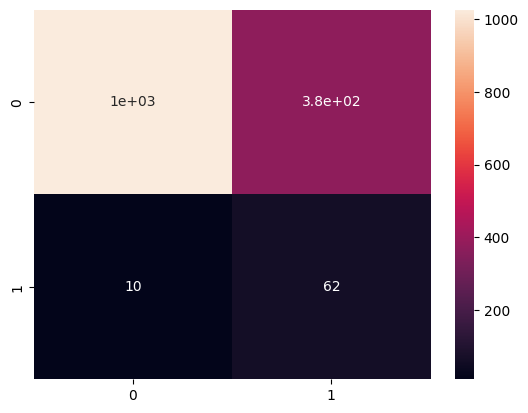

In [276]:
conf = confusion_matrix(y_test,y_pred)
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)
plt.show()

## Random forest 

In [277]:
model = RandomForestClassifier(random_state=5,n_estimators=100,max_depth=15)

In [278]:
model.fit(X_train_smote,y_train_smote)

RandomForestClassifier(max_depth=15, random_state=5)

In [279]:
model.feature_importances_

array([0.02231347, 0.32356249, 0.02345378, 0.01367168, 0.07827281,
       0.12614929, 0.02621696, 0.12874447, 0.09544716, 0.16216789])

In [280]:
y_pred_rf = model.predict(X_test)

In [281]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1401
           1       0.17      0.15      0.16        72

    accuracy                           0.92      1473
   macro avg       0.56      0.56      0.56      1473
weighted avg       0.92      0.92      0.92      1473



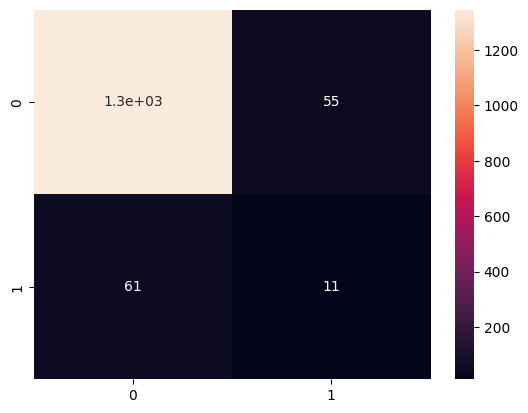

In [282]:
conf = confusion_matrix(y_test,y_pred_rf)
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)
plt.show()

In [283]:
accuracy_score(y_test,y_pred_rf)

0.9212491513917176

In [284]:
pd.crosstab(y_test,y_pred_rf)

col_0,0,1
stroke,,
0,1346,55
1,61,11


In [285]:
import xgboost as GradientBoostingClassifier

In [286]:
xgb_classifier = XGBClassifier()

In [287]:
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [288]:
y_pred = xgb_classifier.predict(X_test)

In [289]:
model = XGBClassifier(random_state=5,n_estimators=100,max_depth=15,learning_rate=1.0)

In [290]:
model.fit(X_train_smote,y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=5, ...)

In [291]:
model.feature_importances_

array([0.03863327, 0.18701456, 0.11409284, 0.0659702 , 0.11172806,
       0.25221086, 0.04508356, 0.03387226, 0.02839196, 0.12300239],
      dtype=float32)

In [292]:
y_pred_rf = model.predict(X_test)

In [293]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1401
           1       0.18      0.11      0.14        72

    accuracy                           0.93      1473
   macro avg       0.57      0.54      0.55      1473
weighted avg       0.92      0.93      0.92      1473



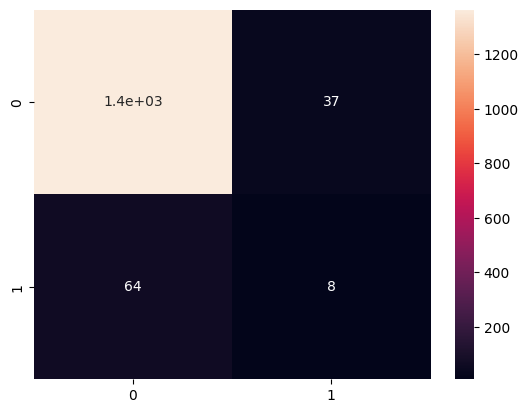

In [294]:
conf = confusion_matrix(y_test,y_pred_rf)
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)
plt.show()

In [295]:
svc = SVC()

In [296]:
svc.fit(X_train_smote,y_train_smote)

SVC()

In [297]:
y_pred_svc=svc.predict(X_test)

In [298]:
accuracy_score(y_test,y_pred_svc)

0.7732518669382213

In [299]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      1401
           1       0.10      0.47      0.17        72

    accuracy                           0.77      1473
   macro avg       0.53      0.63      0.52      1473
weighted avg       0.92      0.77      0.83      1473



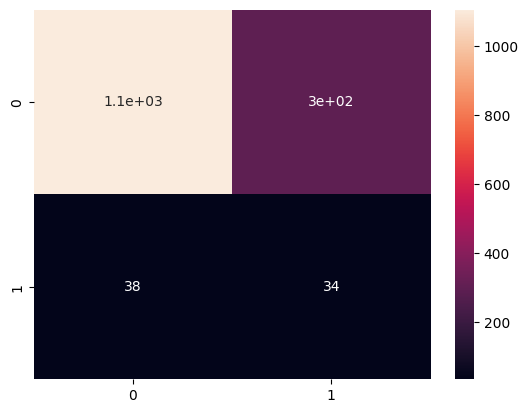

In [300]:
conf = confusion_matrix(y_test,y_pred_svc)
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)
plt.show()

In [301]:
confusion_matrix(y_test,y_pred_svc)

array([[1105,  296],
       [  38,   34]], dtype=int64)

In [302]:
pd.crosstab(y_test,y_pred)

col_0,0,1
stroke,,
0,1393,8
1,70,2


In [303]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [304]:
params= {'n_estimators':[10,20,50,70,80,100,120],
         'criterion': ['entropy','gini'],
          'max_features':['auto',5,7,10,15],
          'random_state':range(0,10)
          }

In [305]:
model_cv=RandomizedSearchCV(RandomForestClassifier(),params)

In [306]:
model_cv.fit(X_train_smote,y_train_smote)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_features': ['auto', 5, 7, 10, 15],
                                        'n_estimators': [10, 20, 50, 70, 80,
                                                         100, 120],
                                        'random_state': range(0, 10)})

In [307]:
model_cv.best_params_

{'random_state': 8,
 'n_estimators': 100,
 'max_features': 'auto',
 'criterion': 'entropy'}

In [308]:
model_cv.best_estimator_

RandomForestClassifier(criterion='entropy', max_features='auto', random_state=8)

In [309]:
model_cv.best_score_

0.9731750407792864

In [310]:
y_pred_grid=model_cv.predict(X_test)
print(classification_report(y_test,y_pred_grid))
pd.crosstab(y_test,y_pred_grid)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1401
           1       0.11      0.06      0.07        72

    accuracy                           0.93      1473
   macro avg       0.53      0.52      0.52      1473
weighted avg       0.91      0.93      0.92      1473



col_0,0,1
stroke,,
0,1370,31
1,68,4


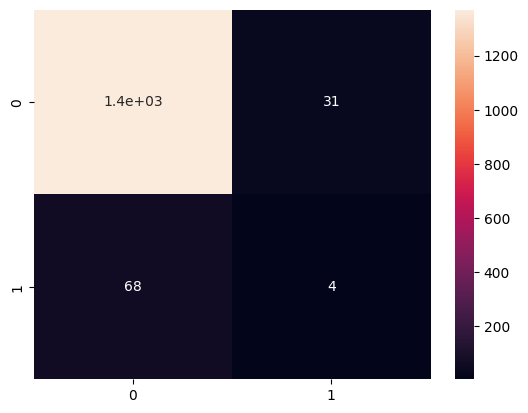

In [311]:
conf = confusion_matrix(y_test,y_pred_grid)
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)
plt.show()

In [312]:
from sklearn.metrics import roc_curve, roc_auc_score

In [313]:
pd.DataFrame(model.predict_proba(X_test)).iloc[:,1]

0       0.005190
1       0.001415
2       0.000103
3       0.000015
4       0.000104
          ...   
1468    0.040457
1469    0.000064
1470    0.915501
1471    0.000016
1472    0.326952
Name: 1, Length: 1473, dtype: float32

In [314]:
y_pred_prob=model.predict_proba(X_test)[:,1]
print(Y_pred_prob)

[4.0888321e-02 2.4498936e-03 8.0549507e-04 ... 2.9773328e-01 6.5109075e-06
 9.6165216e-01]


In [315]:
fpr, tpr , thresholds = roc_curve(y_test,y_pred_prob)

In [316]:
tpr

array([0.        , 0.        , 0.        , 0.01388889, 0.01388889,
       0.02777778, 0.02777778, 0.04166667, 0.04166667, 0.06944444,
       0.06944444, 0.09722222, 0.09722222, 0.11111111, 0.11111111,
       0.125     , 0.125     , 0.13888889, 0.13888889, 0.15277778,
       0.15277778, 0.16666667, 0.16666667, 0.18055556, 0.18055556,
       0.19444444, 0.19444444, 0.22222222, 0.22222222, 0.23611111,
       0.23611111, 0.25      , 0.25      , 0.27777778, 0.27777778,
       0.29166667, 0.29166667, 0.30555556, 0.30555556, 0.31944444,
       0.31944444, 0.33333333, 0.33333333, 0.34722222, 0.34722222,
       0.36111111, 0.36111111, 0.375     , 0.375     , 0.38888889,
       0.38888889, 0.40277778, 0.40277778, 0.41666667, 0.41666667,
       0.43055556, 0.43055556, 0.44444444, 0.44444444, 0.45833333,
       0.45833333, 0.47222222, 0.47222222, 0.48611111, 0.48611111,
       0.5       , 0.5       , 0.52777778, 0.52777778, 0.54166667,
       0.54166667, 0.55555556, 0.55555556, 0.56944444, 0.56944

In [317]:
fpr

array([0.00000000e+00, 7.13775874e-04, 7.85153462e-03, 7.85153462e-03,
       1.07066381e-02, 1.07066381e-02, 1.14204140e-02, 1.14204140e-02,
       2.21270521e-02, 2.21270521e-02, 2.28408280e-02, 2.28408280e-02,
       2.42683797e-02, 2.42683797e-02, 2.92648108e-02, 2.92648108e-02,
       3.28336902e-02, 3.28336902e-02, 3.35474661e-02, 3.35474661e-02,
       5.21056388e-02, 5.21056388e-02, 5.71020700e-02, 5.71020700e-02,
       5.78158458e-02, 5.78158458e-02, 6.56673804e-02, 6.56673804e-02,
       6.92362598e-02, 6.92362598e-02, 7.35189151e-02, 7.35189151e-02,
       7.56602427e-02, 7.56602427e-02, 9.06495360e-02, 9.06495360e-02,
       9.13633119e-02, 9.13633119e-02, 9.49321913e-02, 9.49321913e-02,
       1.14917916e-01, 1.14917916e-01, 1.17773019e-01, 1.17773019e-01,
       1.21341899e-01, 1.21341899e-01, 1.24197002e-01, 1.24197002e-01,
       1.31334761e-01, 1.31334761e-01, 1.38472520e-01, 1.38472520e-01,
       1.41327623e-01, 1.41327623e-01, 1.53461813e-01, 1.53461813e-01,
      

In [318]:
thresholds

array([1.99858749e+00, 9.98587489e-01, 9.61769998e-01, 9.59716916e-01,
       9.33525324e-01, 9.32332635e-01, 9.31370556e-01, 9.28869665e-01,
       6.96998715e-01, 6.60999954e-01, 6.55954242e-01, 6.14764035e-01,
       5.33477485e-01, 5.24145961e-01, 4.17420924e-01, 4.04089421e-01,
       3.57800663e-01, 3.50073636e-01, 3.49131733e-01, 3.28324974e-01,
       1.97702512e-01, 1.95478082e-01, 1.75490335e-01, 1.66483775e-01,
       1.61812022e-01, 1.59908265e-01, 1.41327724e-01, 1.38727486e-01,
       1.28868118e-01, 1.21318959e-01, 1.09537013e-01, 1.09044142e-01,
       1.03984430e-01, 9.97227356e-02, 6.64461404e-02, 6.24721013e-02,
       6.23612963e-02, 6.17732517e-02, 5.23473844e-02, 5.17714582e-02,
       3.13501880e-02, 3.04332804e-02, 2.76430398e-02, 2.64817383e-02,
       2.43447497e-02, 2.42542364e-02, 2.28467081e-02, 2.27500889e-02,
       2.08644848e-02, 2.07190681e-02, 1.79813504e-02, 1.78310592e-02,
       1.69368125e-02, 1.67026203e-02, 1.32634928e-02, 1.28460061e-02,
      

In [319]:
import matplotlib.pyplot as plt

In [320]:
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
auc

0.749008644618923

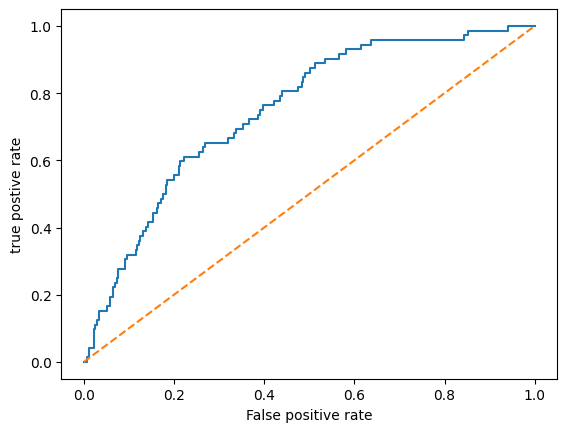

In [321]:
plt.plot(fpr,tpr)
plt.xlabel("False positive rate")
plt.ylabel("true postive rate")
plt.plot([0,1],[0,1],"--")
plt.show()

In [322]:
importances = model.feature_importances_
sort=np.argsort(importances)
label=X.columns[sort]

In [323]:
X.shape
ss = range(X.shape[1])
print(ss)

range(0, 10)


<BarContainer object of 10 artists>

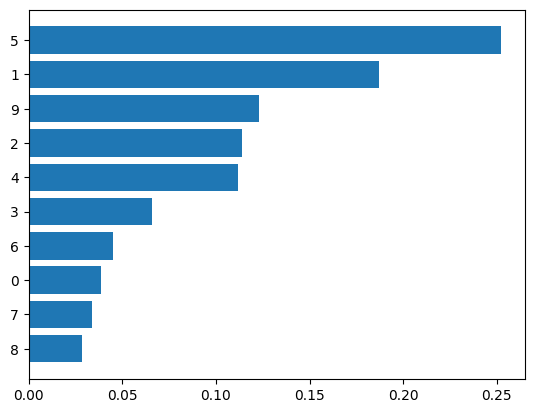

In [324]:
plt.barh(ss,importances[sort],tick_label=label)

In [345]:
input_data = (1,67.0,0 ,1 ,1 ,2 ,1 ,228.69 ,36.6,1)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)


if (prediction[0] ==0):
    print('The person is not heart stroke')
else:
    print('The person is heart stroke')

[0]
The person is not heart stroke


In [346]:
import pickle

In [347]:
filename = 'trained_model.sav'
pickle.dump(classifier,open(filename,'wb'))

In [348]:
loaded_model = pickle.load(open('trained_model.sav','rb'))